# Review 2

# Loading Libraries and Dataset

In [1]:
## Loading Libraries

import numpy as np
import pandas as pd
from math import sqrt

## For visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

# set theme
sns.set_style('whitegrid')
plt.rc('font', size=14)
plt.style.use('tableau-colorblind10')

In [2]:
data = pd.read_csv('Orders-Table 1.csv')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


# Data Analysis

In [3]:
# summary statistics
data.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [4]:
# shape
data.shape

(9800, 18)

In [5]:
# data types
data.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

We can see that Date columns is of **Object** types, Let's change it into **Date** datatype.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [7]:
# change datatype of Date columns.
data['order_date'] = pd.to_datetime(data['Order Date'], dayfirst=True)
data['ship_date'] = pd.to_datetime(data['Ship Date'], dayfirst=True)

In [8]:
# Create `Year-Month`, 'year' and 'month' columns.
data['YearMonth'] = data['order_date'].apply(lambda x: x.strftime("%Y-%m"))
data['year'] = data['order_date'].dt.year
data['month'] = data['order_date'].dt.month_name()

# Create a column for Number of Days require to ship the product.
data['shipInDays'] = (data['ship_date'] - data['order_date']).dt.days

# Viewing first five rows of data.
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,order_date,ship_date,YearMonth,year,month,shipInDays
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017-11-08,2017-11-11,2017-11,2017,November,3
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017-11-08,2017-11-11,2017-11,2017,November,3
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017-06-12,2017-06-16,2017-06,2017,June,4
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016-10-11,2016-10-18,2016-10,2016,October,7
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016-10-11,2016-10-18,2016-10,2016,October,7


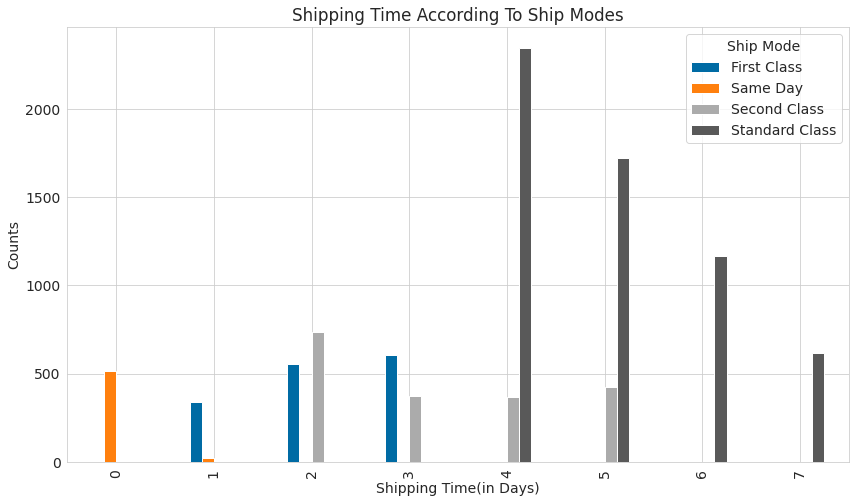

In [9]:
# Shipping Time observation accourding to ShipModes.
a = data.groupby(by = ['shipInDays', 'Ship Mode']).count()['Order ID']

# plot
a.unstack().plot(kind='bar', figsize=(14, 8))

plt.xlabel("Shipping Time(in Days)")
plt.ylabel("Counts")
plt.title("Shipping Time According To Ship Modes")

plt.show()

In [10]:
# Let's consider standard shipping days is 4. if shipping time is greater than 4 days then consider it as delayed.
data['is_delayed'] = data.shipInDays > 4

# Feature columns
features = ['Order ID','Customer ID', 'Product ID', 'order_date', 'ship_date', 'Product Name', 'Country', 'Region', 'State', 'City', 
            'Segment', 'Category', 'Sub-Category', 'Ship Mode', 'YearMonth', 'year', 'month', 'shipInDays', 'is_delayed', 'Sales']

df = data[features]
df.head()

,Order ID,Customer ID,Product ID,order_date,ship_date,Product Name,Country,Region,State,City,Segment,Category,Sub-Category,Ship Mode,YearMonth,year,month,shipInDays,is_delayed,Sales
0,CA-2017-152156,CG-12520,FUR-BO-10001798,2017-11-08,2017-11-11,Bush Somerset Collection Bookcase,United States,South,Kentucky,Henderson,Consumer,Furniture,Bookcases,Second Class,2017-11,2017,November,3,False,261.9600
1,CA-2017-152156,CG-12520,FUR-CH-10000454,2017-11-08,2017-11-11,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",United States,South,Kentucky,Henderson,Consumer,Furniture,Chairs,Second Class,2017-11,2017,November,3,False,731.9400
2,CA-2017-138688,DV-13045,OFF-LA-10000240,2017-06-12,2017-06-16,Self-Adhesive Address Labels for Typewriters b...,United States,West,California,Los Angeles,Corporate,Office Supplies,Labels,Second Class,2017-06,2017,June,4,False,14.6200
3,US-2016-108966,SO-20335,FUR-TA-10000577,2016-10-11,2016-10-18,Bretford CR4500 Series Slim Rectangular Table,United States,South,Florida,Fort Lauderdale,Consumer,Furniture,Tables,Standard Class,2016-10,2016,October,7,True,957.5775
4,US-2016-108966,SO-20335,OFF-ST-10000760,2016-10-11,2016-10-18,Eldon Fold 'N Roll Cart System,United States,South,Florida,Fort Lauderdale,Consumer,Office Supplies,Storage,Standard Class,2016-10,2016,October,7,True,22.3680


In [11]:
df['is_delayed'] = df.is_delayed.map({True:1, False:0})
df.head(2)

,Order ID,Customer ID,Product ID,order_date,ship_date,Product Name,Country,Region,State,City,Segment,Category,Sub-Category,Ship Mode,YearMonth,year,month,shipInDays,is_delayed,Sales
0,CA-2017-152156,CG-12520,FUR-BO-10001798,2017-11-08,2017-11-11,Bush Somerset Collection Bookcase,United States,South,Kentucky,Henderson,Consumer,Furniture,Bookcases,Second Class,2017-11,2017,November,3,0,261.96
1,CA-2017-152156,CG-12520,FUR-CH-10000454,2017-11-08,2017-11-11,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",United States,South,Kentucky,Henderson,Consumer,Furniture,Chairs,Second Class,2017-11,2017,November,3,0,731.94


In [12]:
# create a column for days of week.
df['day_of_week'] = df.order_date.dt.weekday

In [13]:
# Check Missing data
df.isnull().sum()

Order ID        0
Customer ID     0
Product ID      0
order_date      0
ship_date       0
Product Name    0
Country         0
Region          0
State           0
City            0
Segment         0
Category        0
Sub-Category    0
Ship Mode       0
YearMonth       0
year            0
month           0
shipInDays      0
is_delayed      0
Sales           0
day_of_week     0
dtype: int64

In [14]:
# check for duplicate rows.
if df.duplicated().sum() > 0:
    df = df.drop_duplicates()

# 1. Trends and Seasonality

## Line Plot

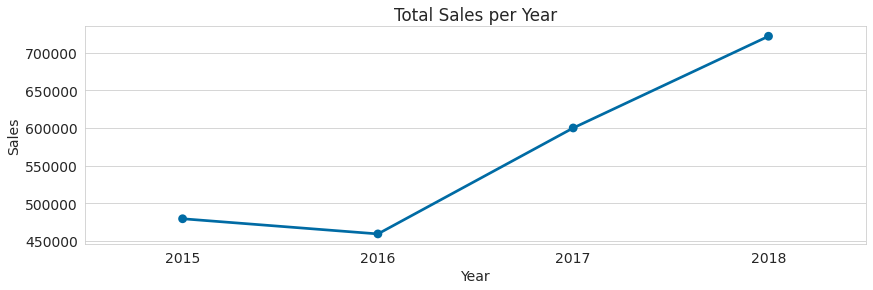

In [15]:
# Let's examine Sales over time.
a = pd.DataFrame(df.groupby(by=['year']).sum())

plt.figure(figsize=(14, 4))
sns.pointplot(x=a.index, y='Sales', data=a)

plt.xlabel('Year')
plt.ylabel('Sales')
plt.title("Total Sales per Year")

plt.show()

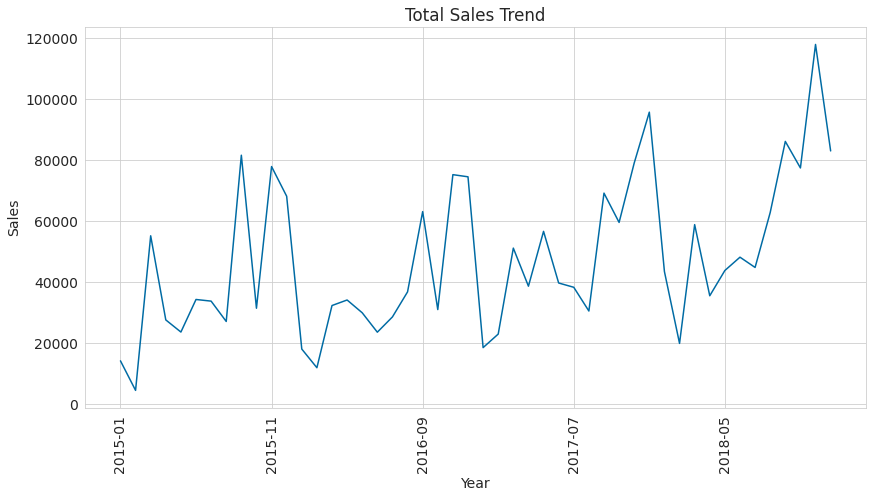

In [16]:
# Year-to-Year observation of TotalSales.
a = pd.DataFrame(df.groupby(by=['YearMonth']).sum())['Sales']

plt.figure(figsize=(14, 7))
a.plot(kind='line')

plt.xlabel('Year')
plt.ylabel('Sales')
plt.title("Total Sales Trend")

plt.xticks(rotation=90)
plt.show()

There is increasing trends or growth in **Sales** over time. There may be **seasonality** to the sales for each year

## Bar Plot

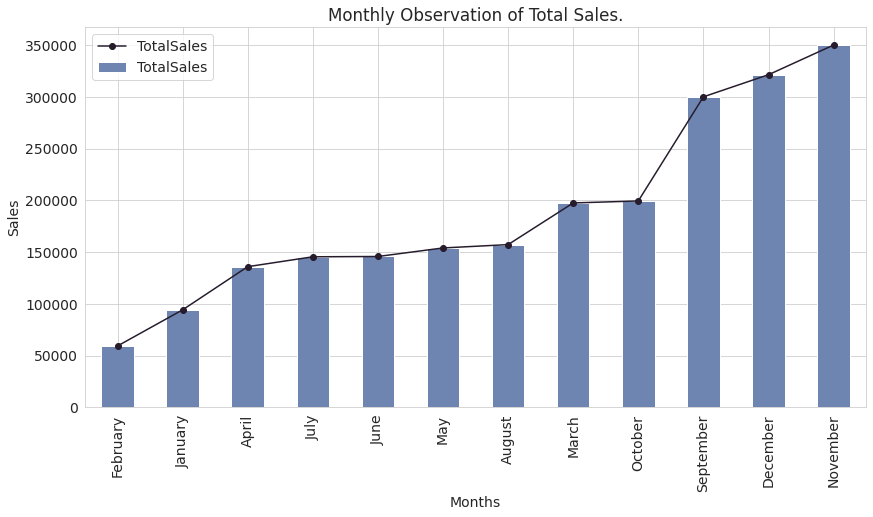

In [17]:
# Monthly observation of Sales Pattern.
monthSales_data = df.groupby(by='month').sum()['Sales']
monthSales_data = monthSales_data.sort_values()

# plot
monthSales_data.plot(kind='line', figsize=(14, 7), color="#261C2C", marker='o', label='TotalSales')
monthSales_data.plot(kind='bar', figsize=(14, 7), color="#6E85B2", label='TotalSales')

plt.xlabel('Months')
plt.ylabel("Sales")
plt.title("Monthly Observation of Total Sales.")

plt.legend()
plt.show()

From above bar plot, we can see that, overall growth in sales obseved in Months of **September**, **December**, **November**. Let's examine, if the same sales pattern observed in each year.

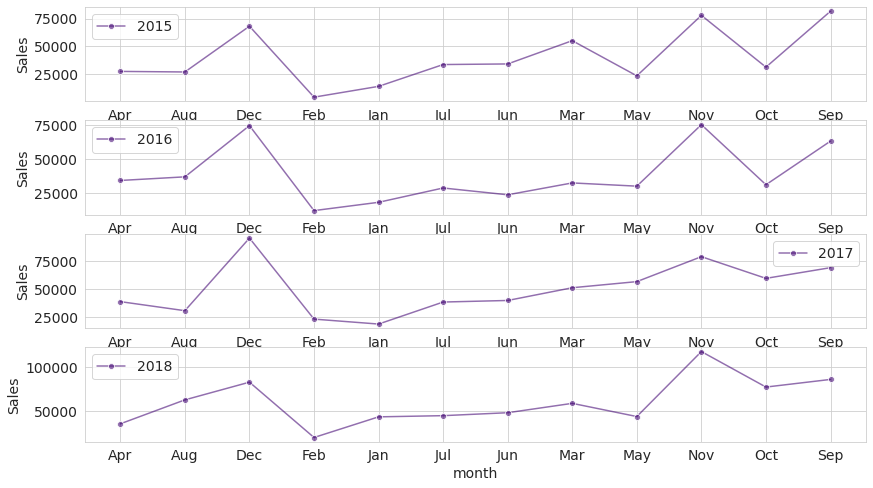

In [18]:
# Monthly Year-to-Year observation of Sales Pattern.
monthSales_data = df.groupby(by=['year', 'month']).sum()

a = monthSales_data.reset_index()
a['month'] = a.month.apply(lambda x:x[:3])
monthSales_data = a.groupby(by=['year', 'month']).sum()['Sales']

# plot
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(14, 8))

yrs = [2015, 2016, 2017, 2018]
for i in range(4):
    yr = yrs[i]
    a = monthSales_data.loc[yr]
    ax[i] = sns.lineplot(x= a.index, y=a.values, data=a, ax=ax[i], label=yr, marker="o", color="#3F007190")
    ax[i].set_ylabel('Sales')

plt.show()

We can see that,There is rise in months of **December**, **November**, and **September**. The **same pattern observed in each year**, however it appears at the different levels.

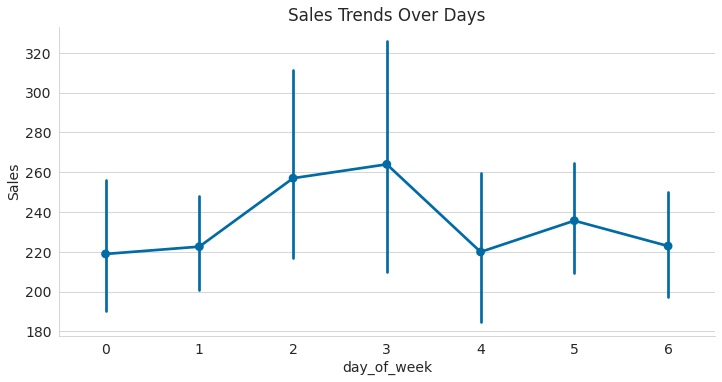

In [19]:
# Sales trends over days.
sns.catplot(data=df, x='day_of_week', y='Sales', kind='point', aspect=2)

plt.title("Sales Trends Over Days")
plt.show()

We can see that, there is maximum sales on **Wednesday** and **Thursday**.

## Density plots

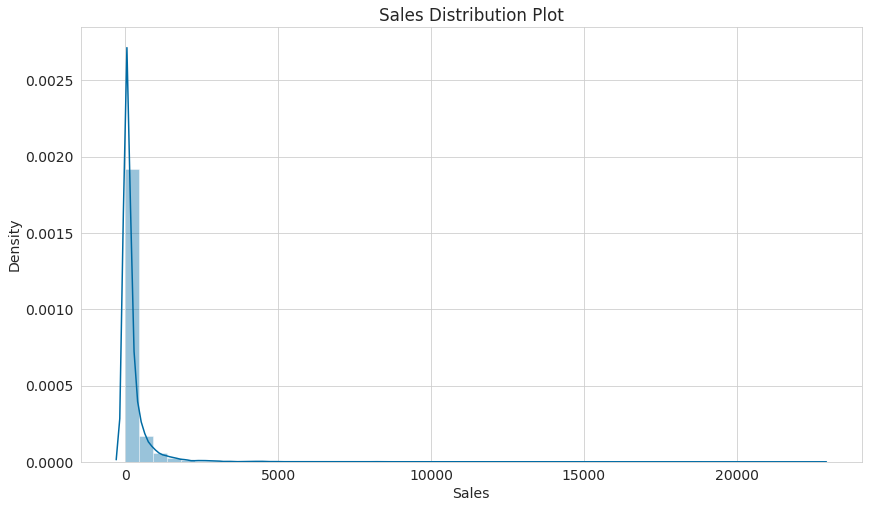

In [20]:
# Sales Distribution
plt.figure(figsize=(14, 8))
sns.distplot(data.Sales)

plt.title('Sales Distribution Plot')
plt.show()

Distribution is **not Gaussian Distribution**. The shape has **long right tail**, which means that data is **Right Skewed**. The most of the sales values are less than 50.

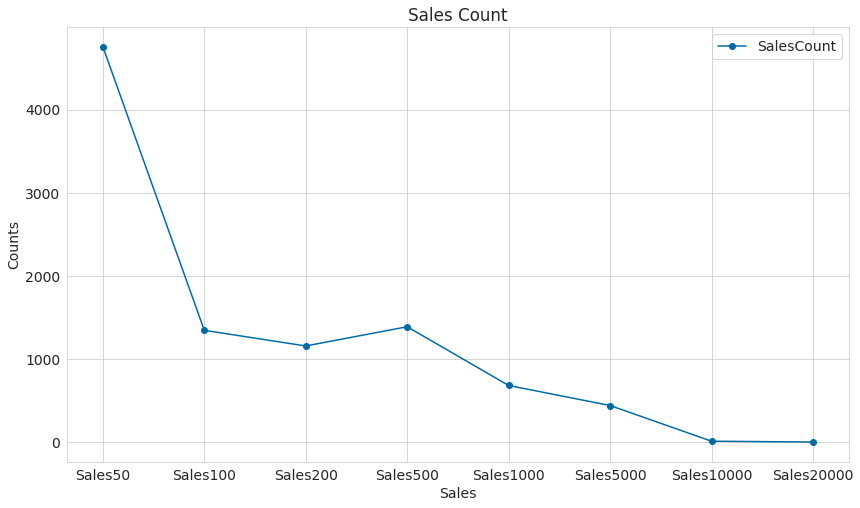

In [21]:
bins = [0, 50, 100, 200, 500, 1000, 5000, 10000, 20000]
labels=['Sales50', 'Sales100', 'Sales200', 'Sales500', 'Sales1000', 'Sales5000', 'Sales10000', 'Sales20000']
a = pd.DataFrame(pd.cut(df['Sales'], bins=bins, labels=labels))
a['SalesCount'] = df['Order ID']

# visualization
a.groupby('Sales').count().plot(kind='line', marker='o', figsize=(14, 8))

plt.ylabel("Counts")
plt.title("Sales Count")

plt.legend()
plt.show()

The plot shows that there is more than **4000** product with sales value **less than 50**.

## Box and Whisker plots for Distribution.
Yearly observation of Distribution of Data. This will gives us an idea of spread of observation for each year.

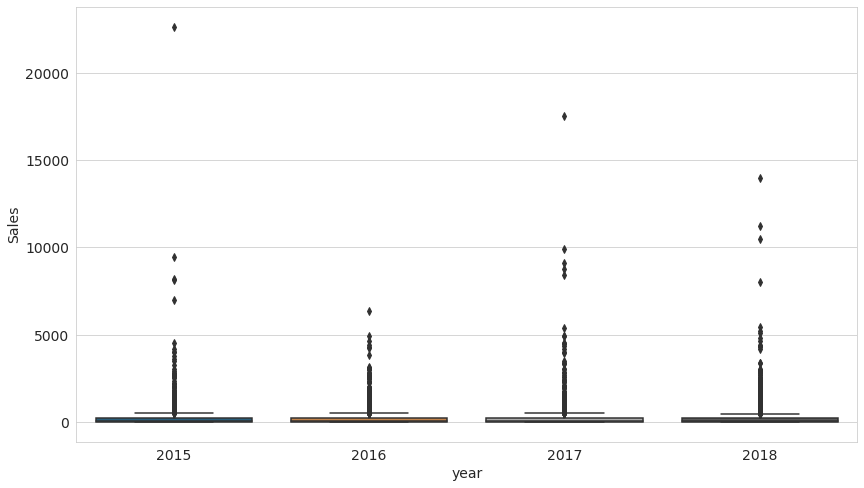

In [22]:
# check for outliers in Sales.
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='year', y='Sales', saturation=0.5)
plt.show()

We can see that there are **outliers** in Sales values for each year.

# 2. Stationarity of Time Series

### 1. Rolling Mean

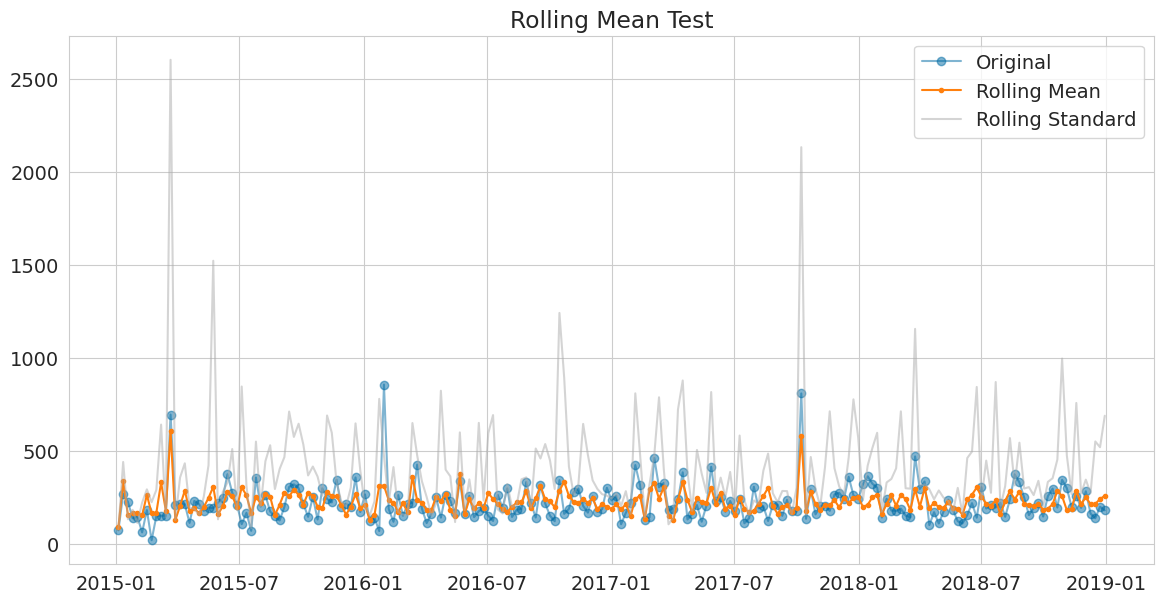

In [23]:
# prepare data
sales_data = df[['order_date', 'Sales']]
sales_data = sales_data.set_index('order_date')

# calculating rolling statistics.
roll_mean = sales_data.rolling(window=7).mean()
roll_std = sales_data.rolling(window=7).std()

# plotting rolling statistics with orignal data mean.
plt.figure(figsize=(14, 7), dpi=100)
data_mean = plt.plot(sales_data.resample('W').mean(), label='Original', marker="o", alpha=0.5)
mean = plt.plot(roll_mean.resample('W').mean(), label="Rolling Mean", marker=".")
std = plt.plot(roll_std.resample('W').std(), label="Rolling Standard", alpha=0.5)

plt.title("Rolling Mean Test")
plt.legend()
plt.show()

### 2. Augmented Dickey-Fuller test

In [24]:
from statsmodels.tsa.stattools import adfuller

print("Augmented Dickey-fuller test result: ")
result = adfuller(sales_data, autolag="AIC")

print("ADF test statistic: ", result[0])
print("p-value:", result[1])

print("Critical Values:")
for key, val in result[4].items():
    print("\t%s : %f" %(key, val))

Augmented Dickey-fuller test result: 
ADF test statistic:  -98.33059943935697
p-value: 0.0
Critical Values:
	1% : -3.431018
	5% : -2.861835
	10% : -2.566927


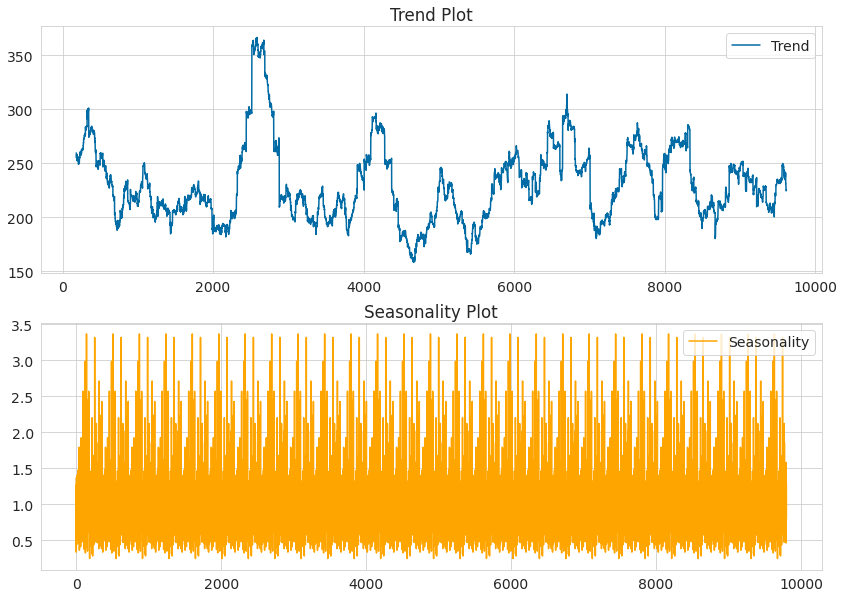

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df.Sales, model = 'multiplicative', freq=365)

estimated_seasonal = decomposition.seasonal
estimated_trend = decomposition.trend
estimated_residuals = decomposition.resid

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(14, 10))
axs[0].plot(estimated_trend, label='Trend')
axs[0].set_title("Trend Plot")
axs[0].legend()

axs[1].plot(estimated_seasonal, label='Seasonality', color='orange')
axs[1].set_title("Seasonality Plot")
axs[1].legend()

plt.show()

The above line plot does **not show** any **trends** in data. So, There **no differencing is required**.

# Building a Model

## 1. AutoRegressive Integrated Moving Average (ARIMA) Model

In [26]:
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

sales = pd.DataFrame(df.groupby(by=['order_date']).sum()['Sales'])

# Fitting ARIMA model
model = sm.tsa.statespace.SARIMAX(sales,order=(1, 0, 0), seasonal_order=(1, 1, 1, 12))
result = model.fit()
print("SARIMAX Summary")
print(result.summary().tables[1])

SARIMAX Summary
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1067      0.031      3.466      0.001       0.046       0.167
ar.S.L12       0.0394      0.023      1.689      0.091      -0.006       0.085
ma.S.L12      -0.9993      0.014    -69.130      0.000      -1.028      -0.971
sigma2      5.199e+06   2.82e-09   1.84e+15      0.000     5.2e+06     5.2e+06


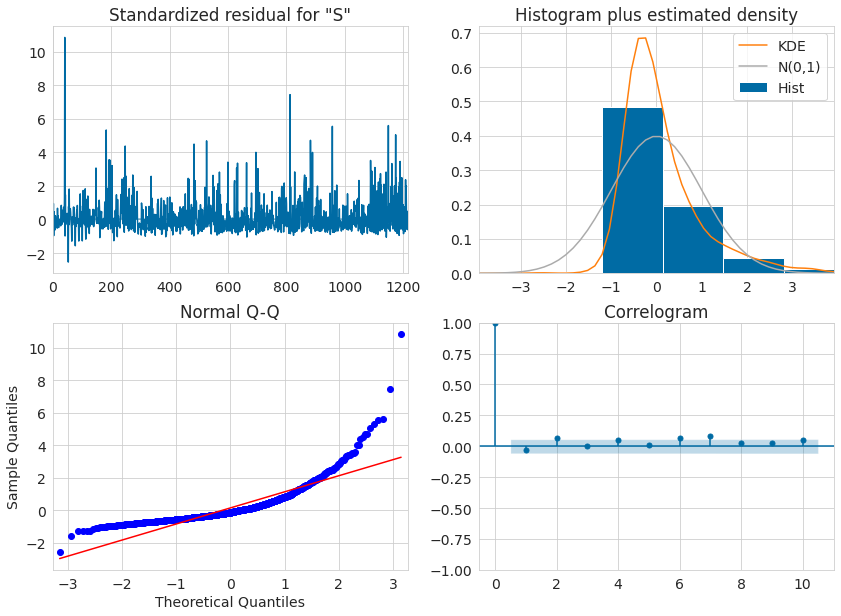

In [27]:
# Visualization of the performance of our model
result.plot_diagnostics(figsize=(14, 10))
plt.show()

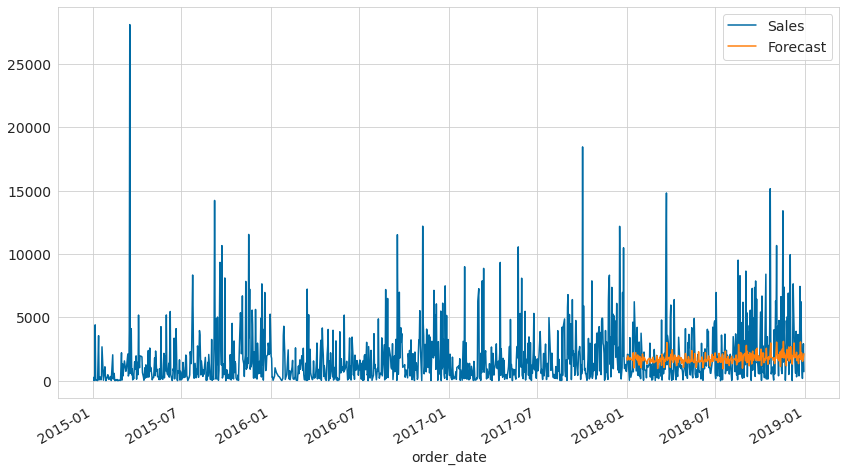

In [28]:
sales['Forecast']= pd.DataFrame(result.predict(start='2018-01-01', end='2018-12-30', dynamic=False))

# visualization for the same
sales.plot(figsize=(14, 8))
plt.show()

In [29]:
actual = sales.loc['2018-01-01':'2018-12-30']['Sales']
preds = sales.loc['2018-01-01':'2018-12-30']['Forecast']
rmse_sarima = sqrt(mean_squared_error(preds, actual))
print("Root Mean Squared Error for SARIMAX:", rmse_sarima)

Root Mean Squared Error for SARIMAX: 2404.877288233176


## 2. XGBoost

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt


/Users/ajay/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
# Create xgb_sales DataFrame grouped by order_date
xgb_sales = pd.DataFrame(df.groupby(by=['order_date']).sum())

# Split data into features (x) and target (y)
x = xgb_sales.drop('Sales', axis=1)
y = xgb_sales['Sales']

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)

# Initialize and train the Random Forest regressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(x_train, y_train)

# Make predictions on the test set
preds_rf = model_rf.predict(x_test)

# Calculate Root Mean Squared Error (RMSE) for Random Forest
rmse_rf = sqrt(mean_squared_error(y_test, preds_rf))

print("Root Mean Squared Error for Random Forest:", rmse_rf)


# Model Evaluation

In [31]:
result = pd.DataFrame([[rmse_sarima], [rmse_xgb]], columns=['RMSE'], index=['SARIMAX','XGBRegressor'])
result

,RMSE
SARIMAX,2404.877288
XGBRegressor,1714.644162


The Root mean squared error of XGBRegressor model is less than SARIMAX. We can use XGBRegressor for forecasting Sales.